>
> # MaaSSim tutorial

 ### quickstart

In [3]:
%load_ext autoreload
%autoreload 2

In [1]:
import os, sys # add MaaSSim to path (not needed if MaaSSim is already in path)
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

prepare

In [2]:
from MaaSSim.utils import get_config, load_G, prep_supply_and_demand  # simulator
from MaaSSim.data_structures import structures as inData
from MaaSSim.simulators import simulate

In [4]:
params = get_config('../../data/config/default.json')  # load configuration

In [5]:
params.nP = 2  # parameterize supply 
params.nV = 1  # and demand

In [5]:
inData = load_G(inData, params)  # load network graph 

In [6]:
inData = prep_supply_and_demand(inData, params)  # generate supply and demand

simulate

In [7]:
sim = simulate(params = params, inData = inData) # simulate

NameError: name 'swsw' is not defined

### walkthrough

demand structure

In [8]:
inData.requests.head(2)

,pax_id,origin,destination,treq,tdep,ttrav,tarr,tdrop,shareable,schedule_id,dist,platform,ride_id,position,sim_schedule
0,0,1433121127,45023464,2020-10-06 12:36:00,NaN,00:02:07,2020-10-06 12:38:07,NaN,False,NaN,1273,0,0,0,node time req_id od 0 ...
1,1,520831192,541199370,2020-10-06 13:24:35,NaN,00:02:09,2020-10-06 13:26:44,NaN,False,NaN,1290,0,1,0,node time req_id od 0 N...


In [9]:
inData.vehicles.head(2)

,pos,event,shift_start,shift_end,platform,expected_income
veh,,,,,,
1,541199370.0,driverEvent.ENDS_SHIFT,0,86400,0,NaN


In [10]:
inData.passengers.head(2)

,pos,event,platforms
0,1433121127,NaN,[0]
1,520831192,NaN,[0]


#### visualize the demand

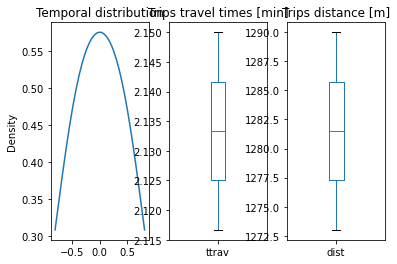

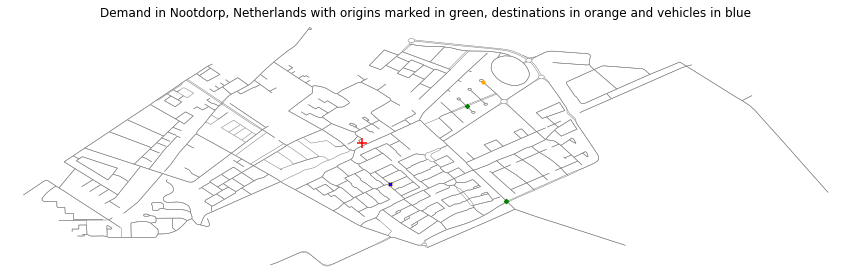

In [11]:
#import matplotlib.pyplot as plt
#inData.requests['dist'] = [inData.skim[request.origin]
#                           [request.destination] for _, request in inData.requests.iterrows()]     
from MaaSSim.visualizations import plot_demand
plot_demand(inData, vehicles = True, s = 10, params = params)

#### results (raw)

In [12]:
list(sim.runs.keys()) #consecutive runs

[0]

In [13]:
list(sim.runs[0].keys()) # single run results

['trips', 'outcomes', 'rides', 'queues']

passengers raw results

In [14]:
sim.runs[0].trips.head(10) #trip segment reports

,pax,pos,t,event,veh_id
0,0,1433121127,0,STARTS_DAY,NaN
1,0,1433121127,0,REQUESTS_RIDE,NaN
2,0,1433121127,0,RECEIVES_OFFER,NaN
3,0,1433121127,15,ACCEPTS_OFFER,NaN
4,0,1433121127,35,ARRIVES_AT_PICKUP,1.0
5,0,1433121127,90,MEETS_DRIVER_AT_PICKUP,1.0
6,0,1433121127,120,DEPARTS_FROM_PICKUP,1.0
7,0,45023464,242,ARRIVES_AT_DROPOFF,1.0
8,0,45023464,252,SETS_OFF_FOR_DEST,NaN
9,0,45023464,252,ARRIVES_AT_DEST,NaN


vehicles raw results

In [15]:
df = sim.runs[0].rides
df[df.veh == 1]

,veh,pos,t,event,paxes
0,1,4.500449e+07,0,STARTS_DAY,[]
1,1,4.500449e+07,0,OPENS_APP,[]
2,1,4.500449e+07,0,RECEIVES_REQUEST,[]
3,1,4.500449e+07,15,ACCEPTS_REQUEST,[]
4,1,4.500449e+07,35,IS_ACCEPTED_BY_TRAVELLER,[]
5,1,1.433121e+09,90,ARRIVES_AT_PICKUP,[]
6,1,1.433121e+09,90,MEETS_TRAVELLER_AT_PICKUP,[]
7,1,1.433121e+09,120,DEPARTS_FROM_PICKUP,[0]
8,1,4.502346e+07,242,ARRIVES_AT_DROPOFF,[0]
9,1,4.502346e+07,2915,RECEIVES_REQUEST,[]


### visualization

In [16]:
df = sim.runs[0].trips
df = df[df.pax == 1]
df

,pax,pos,t,event,veh_id
0,1,520831192,0,STARTS_DAY,NaN
1,1,520831192,2915,REQUESTS_RIDE,NaN
2,1,520831192,2915,RECEIVES_OFFER,NaN
3,1,520831192,2930,ACCEPTS_OFFER,NaN
4,1,520831192,2950,ARRIVES_AT_PICKUP,1.0
5,1,520831192,2960,MEETS_DRIVER_AT_PICKUP,1.0
6,1,520831192,2990,DEPARTS_FROM_PICKUP,1.0
7,1,541199370,3101,ARRIVES_AT_DROPOFF,1.0
8,1,541199370,3111,SETS_OFF_FOR_DEST,NaN
9,1,541199370,3111,ARRIVES_AT_DEST,NaN


<AxesSubplot:>

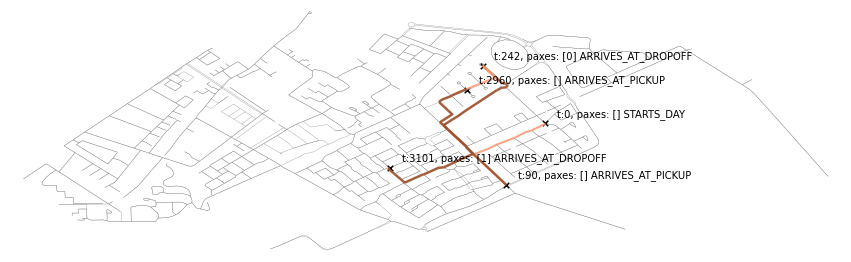

In [17]:
from MaaSSim.visualizations import plot_veh
df = sim.runs[0].rides
plot_veh(inData.G, df[df.veh ==1])

### results processed

In [18]:
sim.output() # call to generate reports

In [19]:
list(sim.res[0].keys())

['pax_exp', 'pax_kpi', 'veh_exp', 'veh_kpi']

In [20]:
sim.res[0].pax_kpi

,ACCEPTS_OFFER,ARRIVES_AT_DROPOFF,ARRIVES_AT_PICKUP,DEPARTS_FROM_PICKUP,MEETS_DRIVER_AT_PICKUP,REQUESTS_RIDE,SETS_OFF_FOR_DEST,STARTS_DAY,RECEIVES_OFFER,IS_REJECTED_BY_VEHICLE,REJECTS_OFFER,ARRIVES_AT_DEST,PREFERS_OTHER_SERVICE,LOSES_PATIENCE,nP
sum,30.0,233.000000,40.0,60.0,65.000000,2915.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
mean,15.0,116.500000,20.0,30.0,32.500000,2915.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
std,0.0,7.778175,0.0,0.0,31.819805,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [21]:
sim.res[0].veh_kpi.T.head(1)

,sum,mean,std
nRIDES,2.0,2.0,NaN


In [22]:
sim.res[0].veh_exp

,nRIDES,nREJECTED,OUT,STARTS_DAY,OPENS_APP,RECEIVES_REQUEST,ACCEPTS_REQUEST,REJECTS_REQUEST,IS_ACCEPTED_BY_TRAVELLER,IS_REJECTED_BY_TRAVELLER,ARRIVES_AT_PICKUP,MEETS_TRAVELLER_AT_PICKUP,DEPARTS_FROM_PICKUP,ARRIVES_AT_DROPOFF,CONTINUES_SHIFT,STARTS_REPOSITIONING,REPOSITIONED,DECIDES_NOT_TO_DRIVE,ENDS_SHIFT
veh,,,,,,,,,,,,,,,,,,,
1,2,0.0,False,0,0,2673.0,30.0,0,40.0,0,65.0,0,60.0,233.0,0,0,0,0,7698.0


In [23]:
sim.res[0].pax_exp.tail()

,ACCEPTS_OFFER,ARRIVES_AT_DROPOFF,ARRIVES_AT_PICKUP,DEPARTS_FROM_PICKUP,MEETS_DRIVER_AT_PICKUP,REQUESTS_RIDE,SETS_OFF_FOR_DEST,STARTS_DAY,RECEIVES_OFFER,IS_REJECTED_BY_VEHICLE,REJECTS_OFFER,ARRIVES_AT_DEST,PREFERS_OTHER_SERVICE,LOSES_PATIENCE
pax,,,,,,,,,,,,,,
0,15.0,122.0,20.0,30.0,55.0,NaN,10.0,0,0,0,0,0,0,0
1,15.0,111.0,20.0,30.0,10.0,2915.0,10.0,0,0,0,0,0,0,0


-------------
Rafal Kucharski, 2020, Delft, r.m.kucharski@tudelft.nl